# Lecture 2-2: Standards for Medical Images

## 0.- Initialize filesystem and libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image, display

## 1.- Introduction to Standards for Medical Images

### 1.1. Information Systems in a Hospital


In **healthcare systems**, the hospital and patient's information is managed according to some **standards**.

The **Hospital Information System (HIS)** is the primary system, designed to manage all the aspects of a hospital's operation (medical, administrative, financial, ...). The HIS contains **all documents about a patient**.

Data about radiological information is kept in a subsystem under the HIS, in the **Radiology Information System (RIS)**,managing **radiological data and workflows**. Both RIS and HIS cover administrative aspects of the patient's stay. However, **images resulting from examinations are not included in the RIS**.

With the **advent of digital imaging** (CT in the 1970s and MRI in the 1980s), another image information system was created: the **Picture Archiving and Communication System (PACS)**, which is responsible of **archiving, retrieving and distributing the images together with related information** within radiology and to departments that ordered the images.

**Two different communication standards** evolved to allow sharing information between these systems:

* **Health Level Seven (HL7)**: was developed as a standard used HIS and RIS to facilitate the exchange, integration, sharing, and retrieval of clinical and administrative data in healthcare.

* **Digital Imaging and Communications in Medicine (DICOM)**: developed as a standard to ensure the **compatibility between different imaging devices and systems**.

  It provides the **file format** and **network communication protocol** for the **transmission of medical images**.
  
  It stores the **image information** along with other **patient data, acquisition parameters, image modality**, ...

### 1.2. N-dimensional medical images


In medical imaging, images can have **several dimensions**:

* **2D images**: traditional images represented as a function of two spatial coordinates, $(x,y)$, as radiography.

* **3D images**: volumetric images represented as a function of three spatial coordinates, $(x,y,z)$, as in MRI and CT scans.

* **4D images**: dynamic volumetric images that include time as an additional dimension, represented as a function of $(x,y,z,t)$. This is used in time-series data such as in cardiac imaging (tracking of heart's motion over time).

* **N-dimensional images**: higher-dimensional datasets that can include additional parameters beyond spatial and temporal dimensions. For example, optical microscopy include multiple channels (more than four dimensions) for different wavelengths.

### 1.3. Medical File Formats

Although **common file formats** such as PNG, JPEG/JPEG2000, and TIFF can be used occasionally for medical images, the particularities of medical images make it more convenient using **specialized formats** that support **headers with additional information, higher bit depth, or handling images with more than 2 dimensions**.

* **TIFF** (Tagged Image File Format): used  for **high-resolution** images and documents.

* **PNG** (Portable Network Graphics): used for images that require **lossless compression**.

* **JPEG/JPEG 2000**: used for compressing medical images to **reduce file size**.

Several **specialized file formats** [1] are commonly used in **medical imaging** to store and transmit images, each with specific characteristics suited to the medical field:

* **DICOM** (Digital Imaging and Communications in Medicine) [2]:
  * The most widely used standard in medical imaging.
  
  * Stores not only the **image data** but also extensive **metadata**, including **patient information, imaging parameters, and study details**.
  
  * Supports a wide range of imaging modalities such as CT, MRI, ultrasound, X-ray, and PET.


* **NIfTI** (Neuroimaging Informatics Technology Initiative [3]:
  
  * Commonly used in **neuroimaging research**.
  
  * Designed to support the needs of **neuroimaging data**, particularly from MRI and fMRI scans.
  
  * Includes **metadata** about the image, such as voxel dimensions and orientation, and **all the slices** in a **single file**.


* **Analyze**:

  * Can be considered an older version of NIfTI, used in neuroimaging.
  
  * It stores the image and the metadata in **separate files**.


* **NRRD** (Nearly Raw Raster Data) [4]:

  * Developed together with a library to **represent and process multi-dimensional data** in medical imaging.

  * Commonly used in research settings for **storing and sharing 3D and 4D medical imaging data**, such as CT or MRI scans.
  
  * Files are **anonymized** and contain no sensitive patient information.


[1]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3948928/

[2]: https://www.dicomstandard.org/

[3]: https://nifti.nimh.nih.gov/

[4]: https://teem.sourceforge.net/nrrd/index.html

### 1.4. Comparison with Other Formats



| **Feature** | **DICOM** | **NIfTI** | **NRRD** | **JPEG/TIF/PNG** |
|---|---|---|---|---|
| **Purpose** | Clinical medical <br> imaging | Neuroimaging <br> research | Multi-dimensional medical <br> imaging research | General-purpose <br> image formats |
| **Metadata** | Extensive (patient info, <br> imaging parameters) | Includes voxel dimensions, <br> orientation | Simple metadata, <br> anonymized | Limited or no <br> medical metadata |
| **File size** | Large, due to high-resolution <br> and metadata | Large, especially for <br> 3D/4D data | Efficient for multi-dimensional <br> data | Typically smaller |
| **Use case** | Clinical diagnostics, <br> interoperability | Neuroimaging (MRI, fMRI) | Research with <br> complex datasets | Non-clinical use, <br> visual presentations |
| **Multi-dimensional <br> support** | Supports multi-slice <br> and volumetric data | Supports 3D/4D imaging | Supports multi-dimensional <br> data | Generally supports <br> 2D images only |

## 2.- DICOM




### 2.1. Introduction to DICOM


**DICOM** (Digital Imaging and Communications in Medicine) is a **standard** [5] for storing, transmitting, and viewing medical images and associated information.

It was developed in 1985 by the American College of Radiology (ACR) and the National Electrical Manufacturers Association (NEMA) to **ensure interoperability between medical imaging devices and systems** (standard ACR-NEMA 300).

The goal was to create a **universal standard for the communication between components** such as imaging systems, printers, archives, and workstations, **as a replacement for the prior stand-alone system clusters and specialized interfaces**.

Over the years, the standard has undergone multiple **revisions** [6]. The **third version** changed the name to DICOM. It **implemented the medical image protocols on top of general networking protocols** (TCP/IP), as the 7th layer of the ISO/OSI layered model.

It is widely used in the **major modalities of medical imaging**, such as CT, MRI, ultrasound, X-ray angiography, nuclear medicine, radiation therapy, endoscopy, dermatology, mammography, dentistry, ophthalmology, radiation dose, ... [7].

In addition to 2D images, **3D volumes are represented in modalities such as CT and MRI as a series of 2D slices**, where **each slice** is stored as a **separate DICOM file**. The full 3D image is reconstructed by stacking these 2D slices.


[5]: https://www.dicomstandard.org/current

[6]: https://www.dicomstandard.org/history

[7]: https://www.dicomlibrary.com/dicom/modality/

#### **Advantages and disadvantages of DICOM**

**Advantages**:

*	**Standardization**: DICOM provides a **standardized format and protocol** for the storage, retrieval, and transmission of medical images and associated data, ensuring compatibility across different devices and systems from various manufacturers.

*	**Integration**: it enables **seamless integration** of medical imaging devices, PACS, RIS, HIS, and other healthcare systems.

*	**Rich metadata**: DICOM files include extensive **metadata**, which provides detailed information about the patient, study, image acquisition parameters, etc.

*	**Flexibility**: supports a **wide range of imaging modalities** (radiology, neurology, surgery, cardiology, oncology, ...).

*	**Large-scale storage**: DICOM is designed to **handle large volumes of image data**, making it suitable for institutions of all sizes.

*	**Advanced image features**: DICOM supports **annotations**, overlays, and other advanced features, which are used for diagnosis and clinical documentation.

*	**Encryption and authentication**: DICOM includes features for **secure data transmission**, including encryption and user authentication, ensuring patient data privacy and compliance with regulations.


**Disadvantages**:

* **Technical complexity**: DICOM is a **complex** standard.

* **File size**: DICOM files can be significantly **larger** than other non-medical image formats due to the inclusion of extensive metadata and high-resolution images.

*	**Performance**: the large file sizes and comprehensive data sets can lead to **slower** transmission and retrieval times. In addition, managing the large amounts of data stored can be **resource-intensive**.

*	**Partial implementation**: some vendors may implement only parts of the DICOM standard or extend it with proprietary features (**private tags** that add custom information), so DICOM ﬁles of diﬀerent manufacturers may not be always compatible. However, this approach allows vendors to **add additional functionality** while still maintaining compliance with the standard..

*	**Cost of implementation and maintenance**: the initial setup, integration, and maintenance of DICOM systems can be **expensive**.



#### **DICOM image manipulation software**

The widespread adoption of DICOM has led to the development of numerous image processing tools and viewers specific for medical applications [8]:

* **ImageJ** [9] (Windows, Linux, Mac): open-source software known for its extensibility. It supports all DICOM formats.

* **Horos** [10] (Mac): is an open source DICOM viewer for Mac. It is the free version of Osirix MD.

* **MicroDicom** [11] (Windows): allows both viewing and processing DICOM images.

* **DICOM Web Viewer** [12] (online): is a browser-based DICOM viewer. It only allows basic manipulation of the image, without exporting capabilities.

* **IrfanView** [13] (Windows): very simple image viewer that supports the DICOM format in addition to other image files.

[8]: https://www.postdicom.com/en/blog/top-25-free-dicom-viewers

[9]: https://imagej.net/ij/

[10]: https://horosproject.org/

[11]: https://www.microdicom.com/

[12]: https://ivmartel.github.io/dwv/

[13]: https://www.irfanview.com/

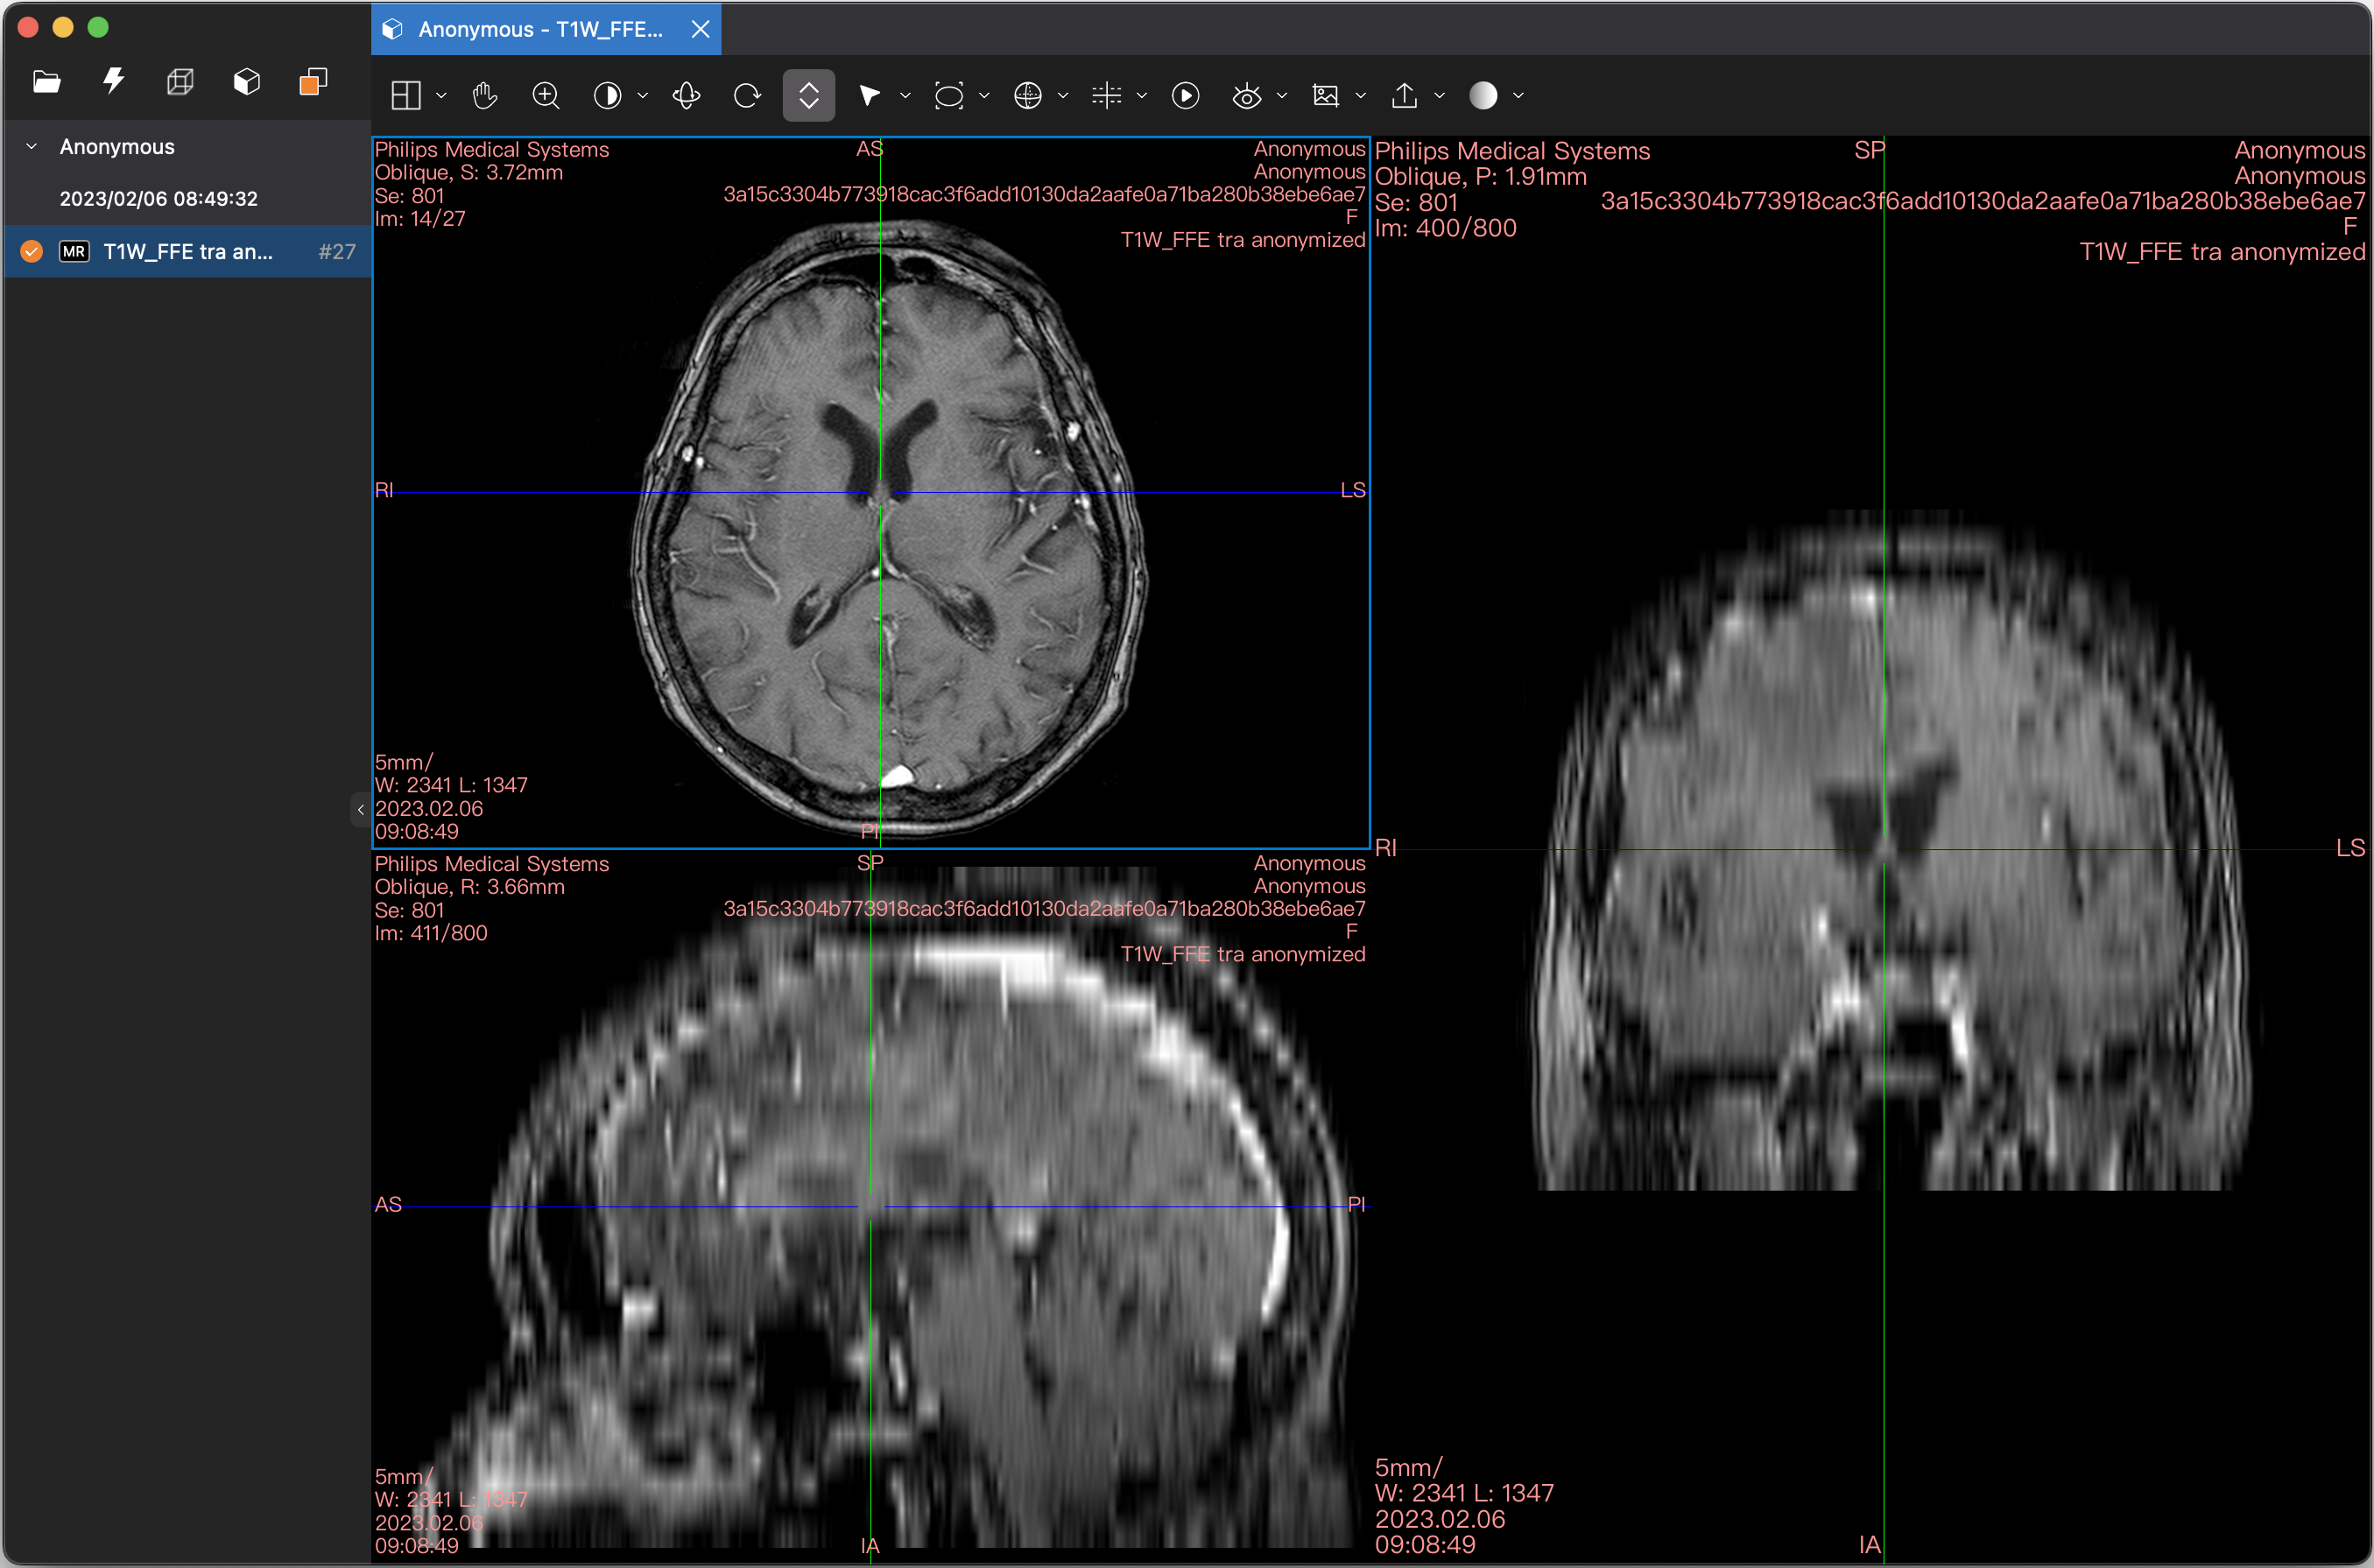

Figure 1: DICOM viewer showing the three anatomical planes.

In [3]:
image_path = '/content/drive/MyDrive/PIM/Images/DICOM_viewer_1.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 1: DICOM viewer showing the three anatomical planes.</p>'
display({'text/html': caption}, raw=True)

In [4]:
image_path = '/content/drive/MyDrive/PIM/Images/DICOM_viewer_2.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 2: DICOM viewer showing a reconstructed 3D volume.</p>'
display({'text/html': caption}, raw=True)

Output hidden; open in https://colab.research.google.com to view.

### 2.2. DICOM file format

DICOM files can have various **file extensions**: .dcm (the most common), .ima, and others.

However, the **content of the file** conforms to the DICOM standard **regardless of the extension**.

A DICOM file consists of a **header** and **image** data [1]:

- **Header**: contains **metadata** about the image, not only about its **size** and **resolution** but also **patient** information, **physician** information, **study** details, and **acquisition** parameters.

	The header is structured in a **series of data elements**, each identified by a unique **tag**.

- **Image Data**: The **pixel data** representing the actual image. It may be **compressed** using various techniques, such as JPEG, Run Length Encoding (RLE), etc.

#### **Header**

The header contains the following **structure** [14]:

* **File Preamble (128 bytes)**: it is not structured as a Tag-Length format. If it is not used, **all bytes** should be set to 0x00.

* **DICOM Prefix (4 bytes)**: contains the ASCII characters “D”, “I”, “C”, and “M”, and serves as an **identifier that the file is a DICOM file**. Like the File Preamble, it is not structured in the Tag-Length format.

* **Meta-information (variable length)**: set of $n$ data elements following the **format Tag-Length-Value** [15]:
	* _Tag_: 4 bytes long (2 bytes for _group number_ + 2 bytes for the _element number_)
	* _Value Representation (VR)_: 2 bytes
	* _Value Length_: 2 or 4 bytes
	* _Value_: Variable length (as specified by the Value Length field)

DICOM uses **little-endian** format by default to store multi-byte integers (e.g., 16-bit or 32-bit values). In this format, the least significant byte (LSB) is stored first, followed by the more significant bytes.

For example, the value 0x1234 is stored as 0x34 0x12.


[14]: https://dicom.nema.org/medical/dicom/current/output/chtml/part10/chapter_7.html

[15]: https://www.dicomlibrary.com/dicom/dicom-tags/

#### **Example of header of a DICOM file**

Let us consider an example DICOM file. The first codes of the file, viewed as hexadecimal codes, are shown as:

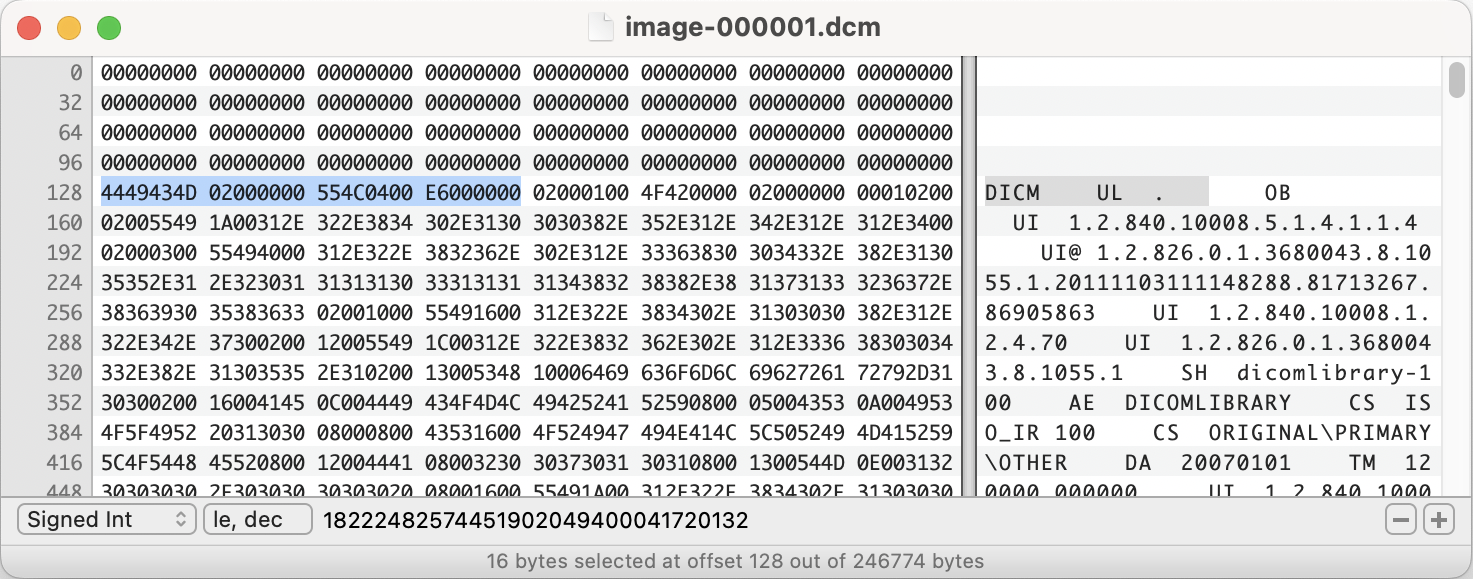

Figure 3: Header of a DICOM file shown as hexadecimal codes: File Preamble, DICOM Prefix and Meta-information.

In [5]:
image_path = '/content/drive/MyDrive/PIM/Images/DICOM_file_1.png'
display(Image(filename=image_path, width=700))
caption = '<p style="text-align: left;">Figure 3: Header of a DICOM file shown as hexadecimal codes: File Preamble, DICOM Prefix and Meta-information.</p>'
display({'text/html': caption}, raw=True)

The first rows of 0's correspond to the **File Preamble**:

$$4 \text{ rows} \times 8 \text{ groups per row} \times 4 \text{ codes per group} = 128 \text{ bytes equal to 0x00}$$.

Next, the **DICOM Prefix** (4 bytes) is formed by `4449434D`, which corresponds to the hexadecimal codes 0x44, 0x49, 0x43 and 0x4D, and these, to the ASCII characters “D”, “I”, “C”, and “M”, respectively.

The next characters, `02 00 00 00  55 4C 04 00  E6 00 00 00`, can be interpreted as:

* **Tag**: `02 00 00 00`
	*	Group Number (2 bytes): `02 00` (hex, little-endian) $\rightarrow$ `0002`
	*	Element Number (2 bytes): `00 00` (hex, little-endian) $\rightarrow$ `0000`
	* Combined Tag: `(0002, 0000)`, which according to [16] corresponds to the field named `File Meta Information Group Length`.

*	**Value Representation (VR)**: `55 4C`
	*	`0x55` corresponds to character `'U'`
	*	`0x4C`: corresponds to character `'L'`
	* Combined VR: `UL` (Unsigned Long)

* **Value Length** (2 bytes): `04 00`
	*	Interpreted in little-endian format, it corresponds to `0004`, which indicates the length in bytes of the next field (Value).

* **Value**: `E6 00 00 00` (next 4 bytes, indicated by Value Length)
	*	Interpreted in little-endian format, it corresponds to `00 00 00 E6`, which is 230 in decimal format.

So, all together, it corresponds to the line of the first data element of the meta-information field:

`(0002, 0000) File Meta Information Group Length  UL: 230`

Notice that the **attribute name** `File Meta Information Group Length` is **not stored** in the file for **efficiency**, only its corresponding code `(0002, 0000)`.

DICOM maintains a **dictionary** where each tag corresponds to an attribute name, which is retrieved while reading the file.

[16]: https://www.dicomlibrary.com/dicom/dicom-tags/



Reading all the fields of the header, they result in the following data fields:

```
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 230
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.1055.1.20111103111148288.81713267.86905863
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.1055.1
(0002, 0013) Implementation Version Name         SH: 'dicomlibrary-100'
(0002, 0016) Source Application Entity Title     AE: 'DICOMLIBRARY'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0012) Instance Creation Date              DA: '20070101'
(0008, 0013) Instance Creation Time              TM: '120000.000000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.1055.1.20111103111148288.81713267.86905863
(0008, 0020) Study Date                          DA: '20070101'
(0008, 0021) Series Date                         DA: '20070101'
(0008, 0022) Acquisition Date                    DA: '20070101'
(0008, 0023) Content Date                        DA: '20070101'
(0008, 002a) Acquisition DateTime                DT: '20070101120000'
(0008, 0030) Study Time                          TM: '120000.000000'
(0008, 0031) Series Time                         TM: '120000.000000'
(0008, 0032) Acquisition Time                    TM: '120000.000000'
(0008, 0033) Content Time                        TM: '120000.000000'
(0008, 0060) Modality                            CS: 'MR'
(0008, 1030) Study Description                   LO: 'Knee (R)'
(0008, 103e) Series Description                  LO: 'AX.  FSE PD'
(0008, 1140)  Referenced Image Sequence  2 item(s) ----
   (0008, 1150) Referenced SOP Class UID            UI: MR Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 1.2.840.113619.2.176.2025.1499492.7040.1171286241.719
   ---------
   (0008, 1150) Referenced SOP Class UID            UI: MR Image Storage
   (0008, 1155) Referenced SOP Instance UID         UI: 1.2.840.113619.2.176.2025.1499492.7040.1171286241.726
   ---------
(0008, 2111) Derivation Description              ST: 'Lossless JPEG compression, selection value 1, point transform 0, compression ratio 2.1453 [Lossless JPEG compression, selection value 1, point transform 0, compression ratio 2.1453]'
(0008, 9215)  Derivation Code Sequence  1 item(s) ----
   (0008, 0100) Code Value                          SH: '121327'
   (0008, 0102) Coding Scheme Designator            SH: 'DCM'
   (0008, 0104) Code Meaning                        LO: 'Full fidelity image, uncompressed or lossless compressed'
   ---------
(0010, 0010) Patient's Name                      PN: 'Anonymized'
(0010, 0020) Patient ID                          LO: '0'
(0010, 1010) Patient's Age                       AS: '000Y'
(0010, 1030) Patient's Weight                    DS: '0.0'
(0018, 0020) Scanning Sequence                   CS: 'SE'
(0018, 0021) Sequence Variant                    CS: ['SK', 'OSP']
(0018, 0022) Scan Options                        CS: ['SAT_GEMS', 'NPW', 'TRF_GEMS', 'FILTERED_GEMS', 'FS']
(0018, 0023) MR Acquisition Type                 CS: '2D'
(0018, 0025) Angio Flag                          CS: 'N'
(0018, 0050) Slice Thickness                     DS: '4.0'
(0018, 0080) Repetition Time                     DS: '2800.0'
(0018, 0081) Echo Time                           DS: '27.524'
(0018, 0082) Inversion Time                      DS: '0.0'
(0018, 0083) Number of Averages                  DS: '1.0'
(0018, 0084) Imaging Frequency                   DS: '63.860145'
(0018, 0085) Imaged Nucleus                      SH: '1H'
(0018, 0086) Echo Number(s)                      IS: '1'
(0018, 0087) Magnetic Field Strength             DS: '1.5'
(0018, 0088) Spacing Between Slices              DS: '4.5'
(0018, 0091) Echo Train Length                   IS: '10'
(0018, 0093) Percent Sampling                    DS: '100.0'
(0018, 0094) Percent Phase Field of View         DS: '100.0'
(0018, 0095) Pixel Bandwidth                     DS: '162.773'
(0018, 1030) Protocol Name                       LO: '324-58-2995/6'
(0018, 1088) Heart Rate                          IS: '474'
(0018, 1090) Cardiac Number of Images            IS: '0'
(0018, 1094) Trigger Window                      IS: '0'
(0018, 1100) Reconstruction Diameter             DS: '170.0'
(0018, 1250) Receive Coil Name                   SH: 'HD TRknee PA'
(0018, 1310) Acquisition Matrix                  US: [0, 384, 224, 0]
(0018, 1312) In-plane Phase Encoding Direction   CS: 'ROW'
(0018, 1314) Flip Angle                          DS: '90.0'
(0018, 1315) Variable Flip Angle Flag            CS: 'N'
(0018, 1316) SAR                                 DS: '0.0533'
(0018, 5100) Patient Position                    CS: 'FFS'
(0020, 000d) Study Instance UID                  UI: 1.2.826.0.1.3680043.8.1055.1.20111103111148288.98361414.79379639
(0020, 000e) Series Instance UID                 UI: 1.2.826.0.1.3680043.8.1055.1.20111103111148288.94019146.71622702
(0020, 0011) Series Number                       IS: '5'
(0020, 0012) Acquisition Number                  IS: '1'
(0020, 0013) Instance Number                     IS: '1'
(0020, 0032) Image Position (Patient)            DS: [-149.033, -118.499, -61.0464]
(0020, 0037) Image Orientation (Patient)         DS: [0.999841, 0.000366209, 0.0178227, -0.000427244, 0.999995, 0.00326545]
(0020, 0052) Frame of Reference UID              UI: 1.2.840.113619.2.176.2025.1499492.7391.1171285944.389
(0020, 1002) Images in Acquisition               IS: '24'
(0020, 1041) Slice Location                      DS: '-59.25741196'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: [0.332, 0.332]
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                         US: 16
(0028, 0102) High Bit                            US: 15
(0028, 0103) Pixel Representation                US: 1
(0028, 0106) Smallest Image Pixel Value          SS: 0
(0028, 0107) Largest Image Pixel Value           SS: 5145
(0028, 0120) Pixel Padding Value                 SS: 0
(0028, 1050) Window Center                       DS: '2572.0'
(0028, 1051) Window Width                        DS: '5145.0'
(7fe0, 0010) Pixel Data                          OB: Array of 244404 elements
```

For example, for the line of the header:

`(0018, 0087) Magnetic Field Strength DS: '1.5'`

the fields of the data element would be interpreted and coded as:

* **Tag**: `(0018, 0087)`, which refers to the attribute `Magnetic Field Strength`, is stored in the file as 4 bytes in little-endian format:
	*	Group Number: `18 00` (2 bytes)
	*	Element Number: `87 00` (2 bytes)

*	**Value Representation (VR)**: 2 bytes.

	DS stands for Decimal String, a specific data type used in DICOM to represent decimal numbers in text form. VR specifies how the value should be interpreted and stored. Other possibilities for this field are IS (integer string), ST (short text), TM (time), DA (date), UI (unique identifier), ...

	*	`D`: ASCII code 0x44
	*	`S`: ASCII code 0x53
	* Combined VR: `44 53`

* **Value Length**: uses 2 bytes to indicate the length of the next field, Value, which is 4 bytes.

	So, it is stored as `04 00`(little-endian).

* **Value**: '1.5' (ending with 0x00).

	These characters correspond to the hexadecimal codes 0x31, 0x2E, 0x35, 0x00.

So, the DICOM file would store:

| **Tag**      | **VR** | **Value Length** | **Value**        |
|--------------|--------|------------------|------------------|
| 18 00 87 00  | 44 53  | 04 00            | 31 2E 35 00      |

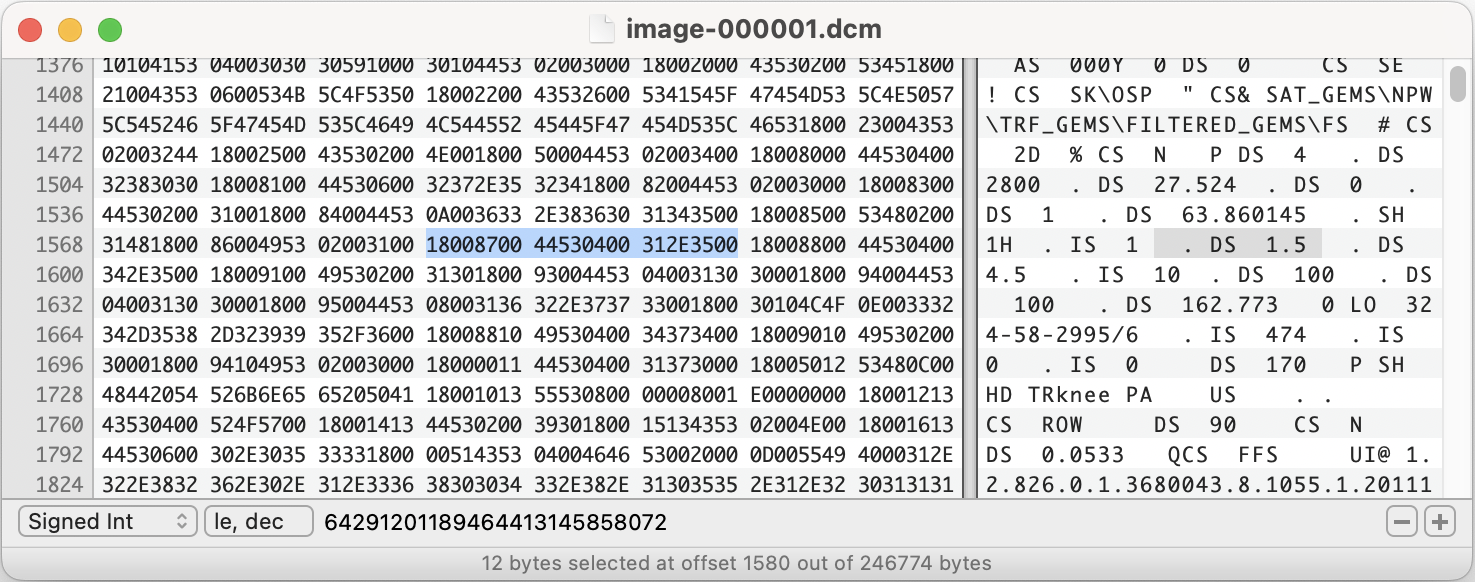

Figure 4: Hexadecimal codes for the file preamble, DICOM prefix, and the first data element: (0002, 0000) File Meta Information Group Length UL: 230).

In [6]:
image_path = '/content/drive/MyDrive/PIM/Images/DICOM_file_2.png'
display(Image(filename=image_path, width=700))
caption = '<p style="text-align: left;">Figure 4: Hexadecimal codes for the file preamble, DICOM prefix, and the first data element: (0002, 0000) File Meta Information Group Length  UL: 230).</p>'
display({'text/html': caption}, raw=True)

### 2.3. Managing DICOM files in Python with PyDicom

**Pydicom** [1] is an open-source Python library specifically designed to handle DICOM files.

Pydicom allows for the **reading, modification, and writing** of DICOM files within a Python environment:

* Pydicom can **read DICOM files and extract the metadata and image** data contained within them.

* It allows for the **modification of the metadata** of DICOM files, such as updating patient information, changing study descriptions, or altering image acquisition parameters.

* After making modifications, Pydicom **allows saving the changes** by writing the modified data back to a new DICOM file.

* Pydicom is **compatible** with various DICOM standards (versions, modalities, ...) and supports a **wide range of DICOM tags**.

* Pydicom can be **easily integrated with other Python libraries** such as NumPy, Matplotlib, and OpenCV.

[1]: https://pydicom.github.io/

#### **Examples of DICOM files**

Examples of DICOM files can be downloaded form several sites on internet [17] [18] [19] [20] [21] as well as dataset such as Kaggle [22].

[17]: https://www.dicomlibrary.com/?manage=02ef8f31ea86a45cfce6eb297c274598

[18]: https://3dicomviewer.com/dicom-library/

[19]: https://www.visus.com/en/downloads/jivex-dicom-viewer.html

[20]: https://support.dcmtk.org/redmine/projects/dcmtk/wiki/DICOM_images

[21]: http://www.dclunie.com/medical-image-faq/html/part8.html

[22]: https://www.kaggle.com/



#### **Basic operations with DICOM files**

In [7]:
# Install pydicom library
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00


In [8]:
# Import libraries
import pydicom
import matplotlib.pyplot as plt

In [10]:
# Read a DICOM file
dicom_file_path = '/content/drive/MyDrive/PIM/Images/IM000015.dcm'
dicom_file = pydicom.dcmread(dicom_file_path)

In [11]:
# Print all fields of metadata
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.4087122745.11320.1706772658.3617
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.6
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_366'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20231101'
(0008, 0013) Instance Creation Time              TM: '193417.376'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.89.5


In [12]:
# List all attribute names and print them
attributes = dir(dicom_file)
for attribute in attributes:
    print(attribute)

AccessionNumber
AcquisitionDate
AcquisitionDuration
AcquisitionMatrix
AcquisitionNumber
AcquisitionTime
AdditionalPatientHistory
AdmittingDiagnosesDescription
Allergies
B1rms
BitsAllocated
BitsStored
BodyPartExamined
CodeMeaning
CodeValue
CodingSchemeDesignator
Columns
CommentsOnThePerformedProcedureStep
ContentDate
ContentTime
ContrastBolusAgent
ConversionType
DeviceSerialNumber
DiffusionBValue
DiffusionGradientOrientation
DigitalImageFormatAcquired
EchoNumbers
EchoTime
EchoTrainLength
EthnicGroup
FlipAngle
FrameOfReferenceUID
HeartRate
HighBit
HighRRValue
ImageOrientationPatient
ImagePositionPatient
ImageType
ImagedNucleus
ImagingFrequency
ImagingServiceRequestComments
InPlanePhaseEncodingDirection
InstanceCreationDate
InstanceCreationTime
InstanceCreatorUID
InstanceNumber
InstitutionAddress
InstitutionName
InstitutionalDepartmentName
IntervalsAcquired
IntervalsRejected
IssueDateOfImagingServiceRequest
IssueTimeOfImagingServiceRequest
Laterality
LowRRValue
MRAcquisitionType
MagneticF

In [13]:
# Print basic information about the DICOM file
print("Patient Name:", dicom_file.PatientName)
print("Modality:", dicom_file.Modality)
print("Study Date:", dicom_file.StudyDate)
print("Magnetic Field Strength:", dicom_file.MagneticFieldStrength)
print("Pixel Spacing:", dicom_file.PixelSpacing)
print(f"Image Size: {dicom_file.Rows} x {dicom_file.Columns}")

# Access the Pixel Spacing attribute
pixel_spacing = dicom_file.PixelSpacing

# Image dimensions in pixels
image_width_pixels = dicom_file.Columns
image_height_pixels = dicom_file.Rows

# Calculate real dimensions
image_width_mm = image_width_pixels * pixel_spacing[0]
image_height_mm = image_height_pixels * pixel_spacing[1]

print(f"Image dimensions (width x height): {image_width_mm:.2f} mm x {image_height_mm:.2f} mm")

Patient Name: Anonymous
Modality: MR
Study Date: 20231101
Magnetic Field Strength: 1.5
Pixel Spacing: [0.34226191043853, 0.34226191043853]
Image Size: 672 x 672
Image dimensions (width x height): 230.00 mm x 230.00 mm


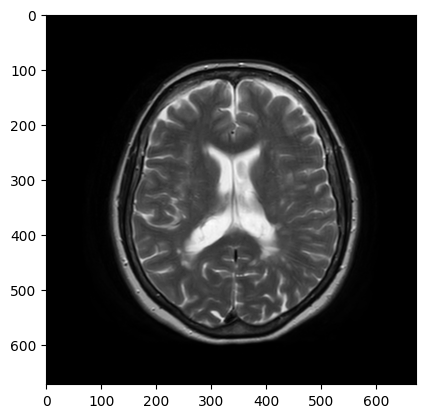

In [15]:
# Obtain the image from the DICOM file
image = dicom_file.pixel_array

# Show the image
plt.imshow(image, cmap='gray')
plt.show()

## References

* Chityala, Ravishankar, _Image Processing and Acquisition Using Python: Chapter 3 (Image and Its Properties)_. Chapman and Hall/CRC, 2022. 9780367531577

* Toennies, Klaus D., _Guide to Medical Image Analysis - Methods and Algorithms: Chapter 3 (Image Storage and Transfer)_. Springer, 2017. 9781447174035

* Birkfellner, Wolfgang, _Applied Medical Image Processing - A Basic Course: Chapter 3 (Image Representation)_. CRC Press, 2014. 9781466555570